In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [410]:
data=pd.read_csv("datos_limpios_2.csv")
data.head()


,Unnamed: 0,NI,CC,date,CH,NM,NC,NH,CS,AC,CV,hora_inicio,vel_inicial,vel_final,dir_inicial,dir_final,ND
0,0,11,2,07/09/2013,312,14,Cauca,MOJARRAL I,0004,3.04,CC85-92,17,2.0,1.5,NNE,WNW,58
1,1,11,2,07/09/2013,312,14,Cauca,MOJARRAL I,0007,3.60,CC85-92,18,3.1,0.7,NNW,NNW,58
2,2,11,2,04/09/2013,313,27,Cruces,SAN JOAQUIN I,0003,2.30,CC85-92,14,2.7,4.1,NNW,WNW,58
3,3,11,2,04/09/2013,313,27,Cruces,SAN JOAQUIN I,0004,1.50,CC85-92,13,2.3,3.1,NW,NNW,58
4,4,11,2,02/09/2013,313,27,Cruces,SAN JOAQUIN I,0006,5.60,CC85-92,15,2.0,2.1,SE,SSE,58


In [411]:
print(data.groupby('dir_final').size())

dir_final
E       7072
N      11500
NE     14282
NNE    17519
NNW     6546
NW     11048
S       5248
SE      6289
SSE     8111
SSW     3212
SW      6099
W       6971
WNW     7630
WSW     3897
dtype: int64


In [412]:
data['dir_inicial']=data['dir_inicial'].replace('','',regex=True)
print(data.groupby('dir_inicial').size())

dir_inicial
E       6562
ENE     7008
ESE     4440
N      11506
NE     14053
NNE    10751
NNW     7796
NW     11654
S       5009
SE      5927
SSE     3560
SSW     3708
SW      5987
W       7115
WNW     7026
WSW     3322
dtype: int64


In [413]:
df=pd.DataFrame(data, columns= ['NI','CC','date','CH','NM','NC','NH','CS','AC','CV','hora_inicio','vel_inicial','vel_final','dir_inicial','dir_final','ND'])

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115424 entries, 0 to 115423
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NI           115424 non-null  int64  
 1   CC           115424 non-null  int64  
 2   date         115424 non-null  object 
 3   CH           115424 non-null  object 
 4   NM           115424 non-null  int64  
 5   NC           115424 non-null  object 
 6   NH           115424 non-null  object 
 7   CS           115424 non-null  object 
 8   AC           115424 non-null  float64
 9   CV           115424 non-null  object 
 10  hora_inicio  115424 non-null  int64  
 11  vel_inicial  115424 non-null  float64
 12  vel_final    115424 non-null  float64
 13  dir_inicial  115424 non-null  object 
 14  dir_final    115424 non-null  object 
 15  ND           115424 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 14.1+ MB


In [431]:
df

,NI,CC,date,CH,NM,NC,NH,CS,AC,CV,hora_inicio,vel_inicial,vel_final,dir_inicial,dir_final,ND
0,11,2,2013-07-09,312,14,Cauca,MOJARRAL I,0004,3.04,CC85-92,17,2.0,1.5,NNE,WNW,58
1,11,2,2013-07-09,312,14,Cauca,MOJARRAL I,0007,3.60,CC85-92,18,3.1,0.7,NNW,NNW,58
2,11,2,2013-04-09,313,27,Cruces,SAN JOAQUIN I,0003,2.30,CC85-92,14,2.7,4.1,NNW,WNW,58
3,11,2,2013-04-09,313,27,Cruces,SAN JOAQUIN I,0004,1.50,CC85-92,13,2.3,3.1,NW,NNW,58
4,11,2,2013-02-09,313,27,Cruces,SAN JOAQUIN I,0006,5.60,CC85-92,15,2.0,2.1,SE,SSE,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115419,9,2,2019-12-15,80111,16,nd,LA ARGELIA,359,4.00,CC 01-746,17,2.2,1.6,E,S,58
115420,9,2,2019-12-15,80111,16,nd,LA ARGELIA,359,3.00,CC 01-746,16,4.5,3.7,ENE,E,58
115421,9,2,2019-12-16,80323,16,nd,LA MANSION 1,7,3.77,CC 85-92,18,1.6,1.5,N,N,58
115422,9,2,2019-12-16,80323,16,nd,LA MANSION 1,004A,2.00,CC 85-92,18,2.2,1.7,N,N,58


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115424 entries, 0 to 115423
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   NI           115424 non-null  int64         
 1   CC           115424 non-null  int64         
 2   date         115424 non-null  datetime64[ns]
 3   CH           115424 non-null  object        
 4   NM           115424 non-null  int64         
 5   NC           115424 non-null  object        
 6   NH           115424 non-null  object        
 7   CS           115424 non-null  object        
 8   AC           115424 non-null  float64       
 9   CV           115424 non-null  object        
 10  hora_inicio  115424 non-null  int64         
 11  vel_inicial  115424 non-null  float64       
 12  vel_final    115424 non-null  float64       
 13  dir_inicial  115424 non-null  object        
 14  dir_final    115424 non-null  object        
 15  ND           115424 non-null  int6

In [442]:
print(df.groupby('vel_inicial').size())

vel_inicial
0.00         16
0.50        315
0.51          7
0.52          2
0.53          2
           ... 
209.00        1
233.00        1
235.00        1
282.00        1
43586.00      1
Length: 479, dtype: int64


c:\program files\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\program files\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\program files\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\program files\python36\lib\site-packages\pandas\plotting\_m

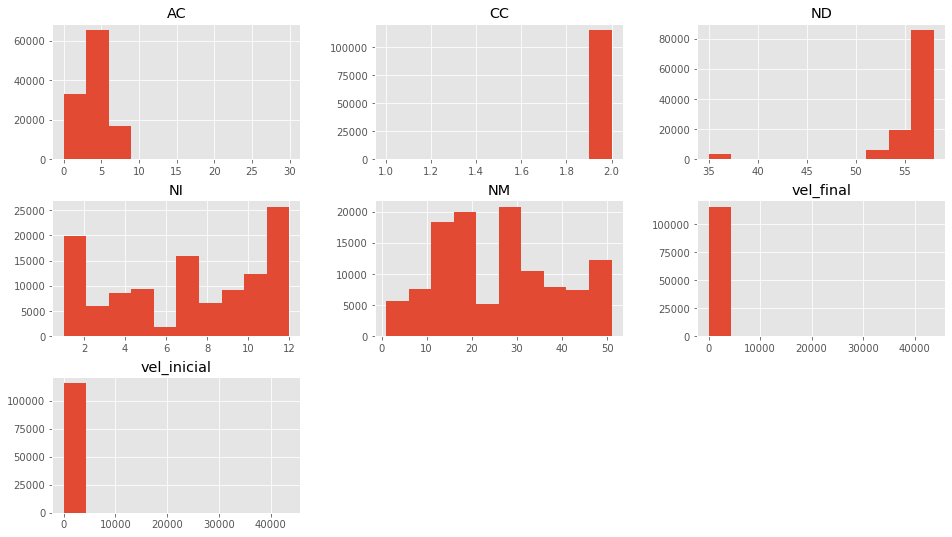

In [471]:
df.drop(['hora_inicio'],1).hist()
plt.show()

c:\program files\python36\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


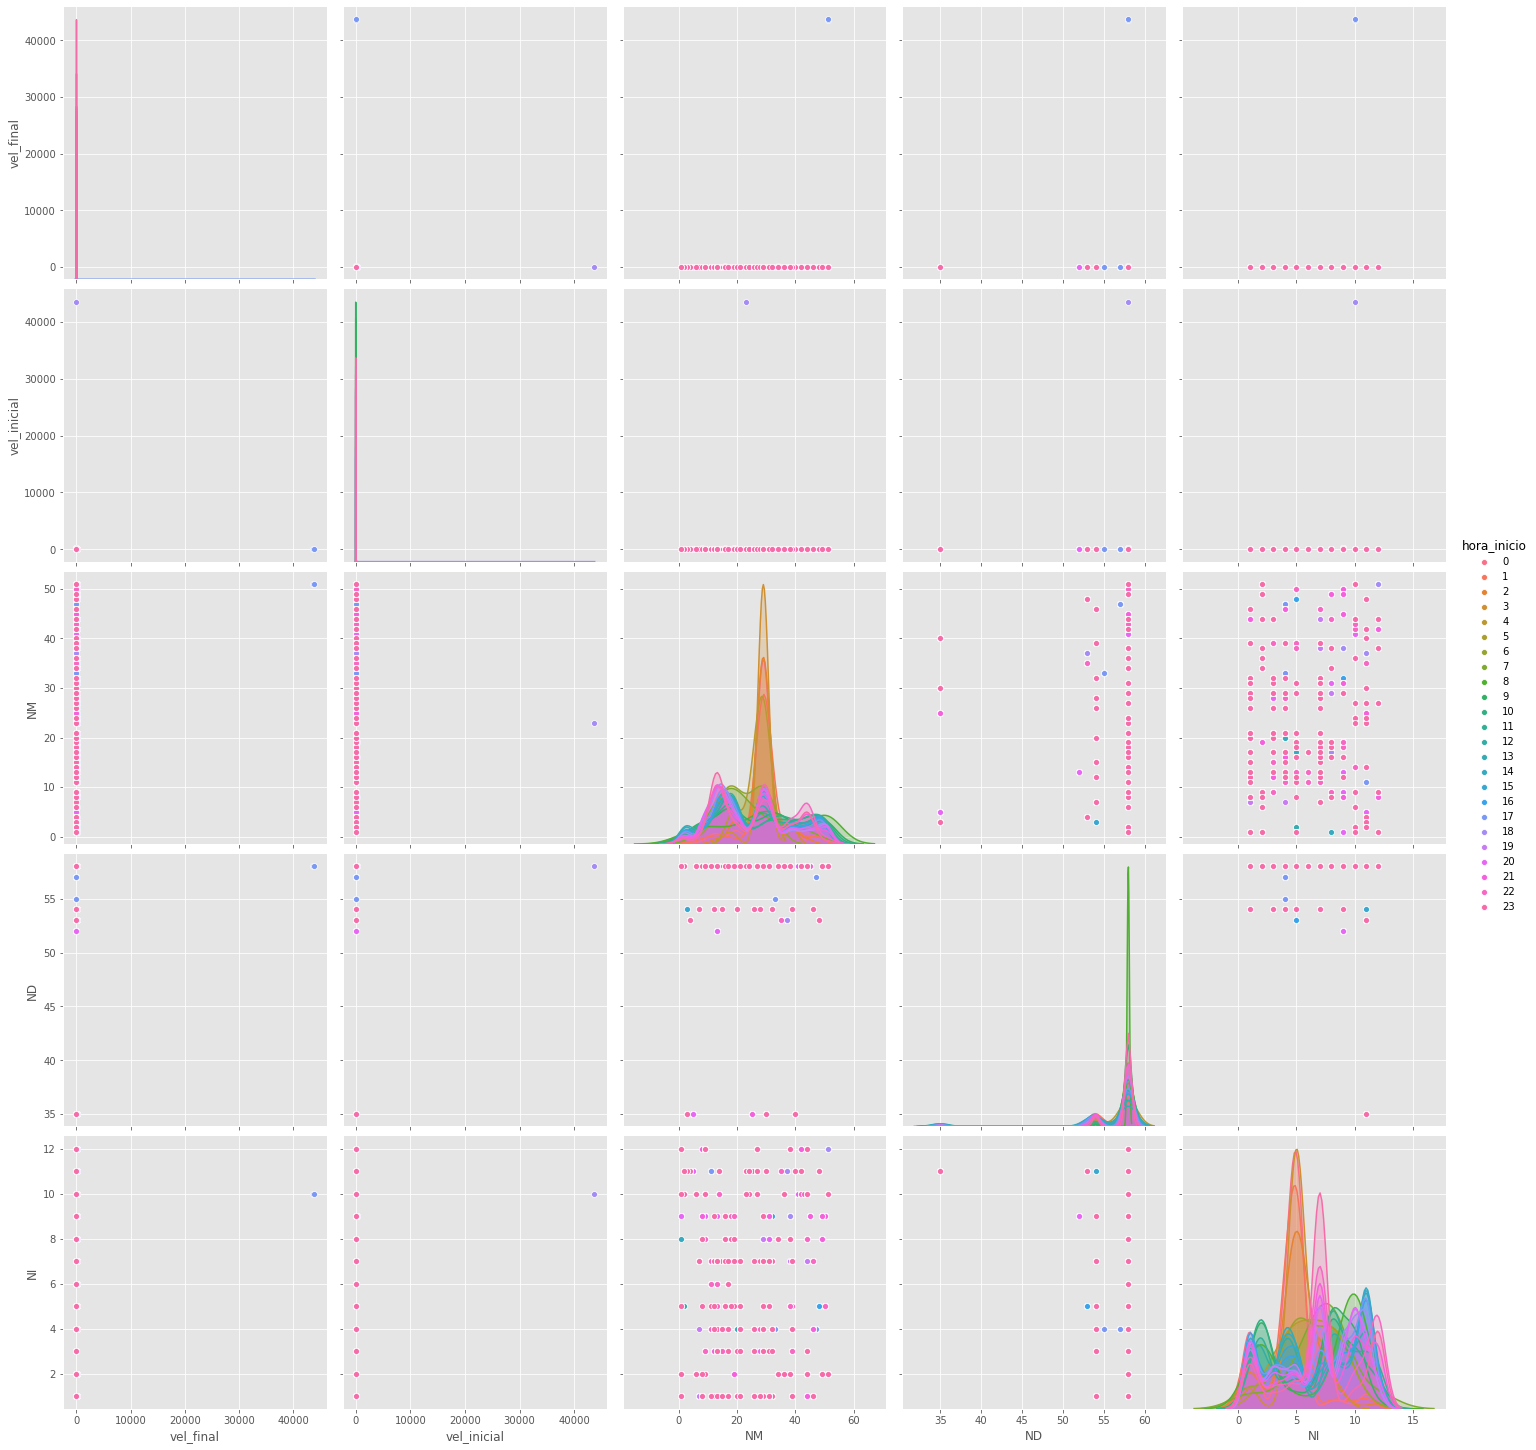

In [454]:
sb.pairplot(df.dropna(), hue='hora_inicio',height=4,vars=["vel_final","vel_inicial","NM","ND","NI"],kind='scatter')

In [472]:
X = np.array(df[["NM","NI","ND"]])
y = np.array(df['hora_inicio'])
X.shape

(115424, 3)

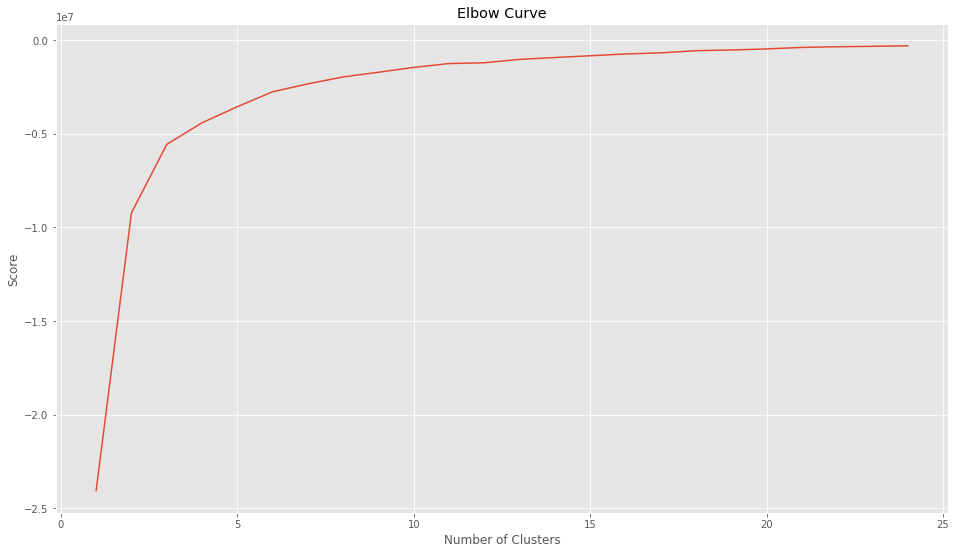

In [502]:
Nc = range(1, 25)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [503]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[44.8629522   8.6991965  55.13097439]
 [ 5.82464884 11.         35.        ]
 [16.15766051  6.24746446 57.27515049]
 [29.69624688  5.2472735  56.93870712]
 [ 6.53043167  9.06300831 57.68334972]]


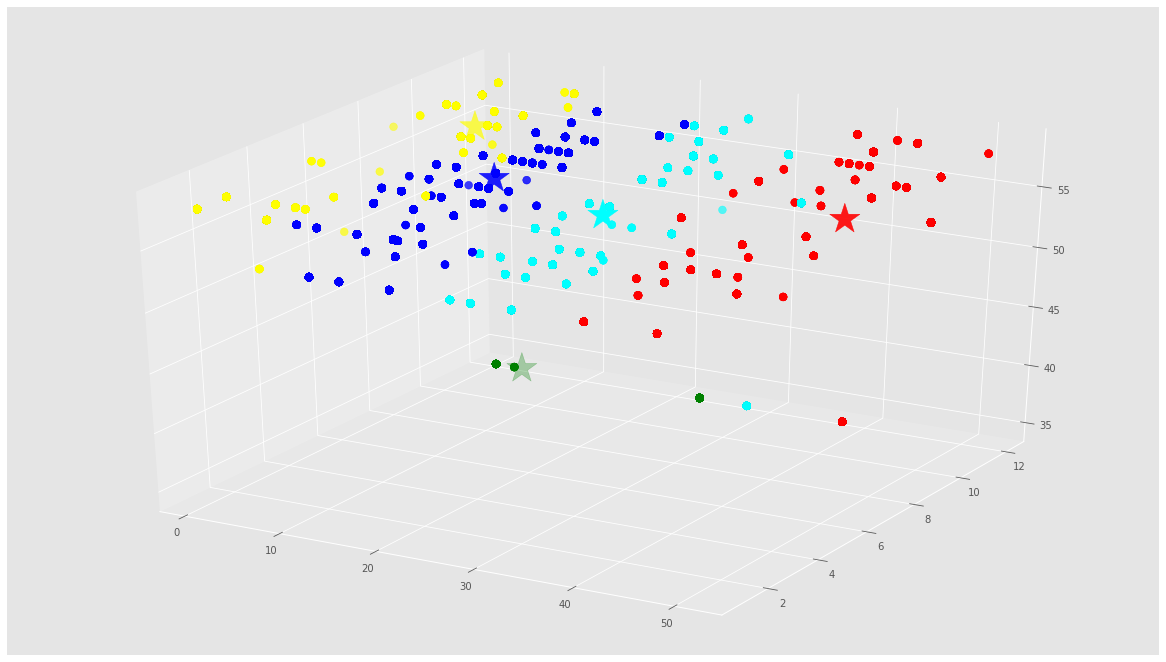

In [504]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

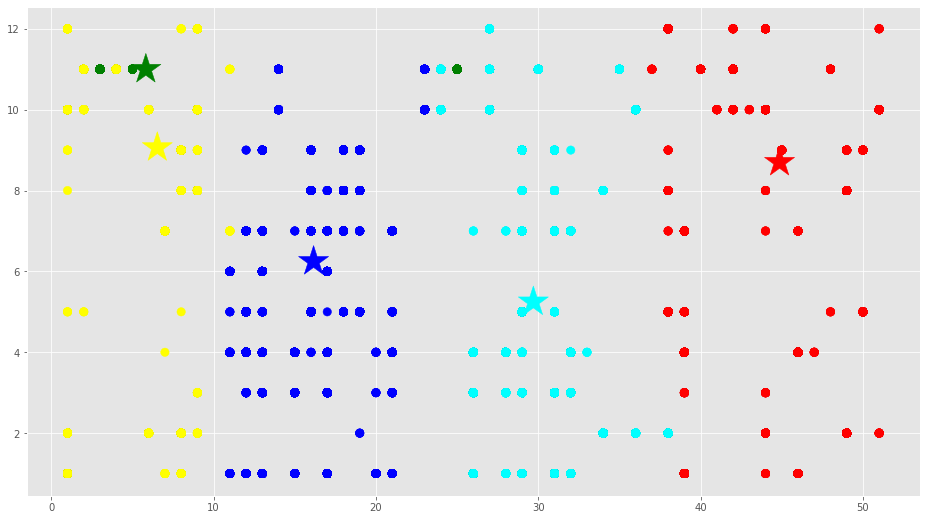

In [506]:
f1 = df['NM'].values
f2 = df['NI'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

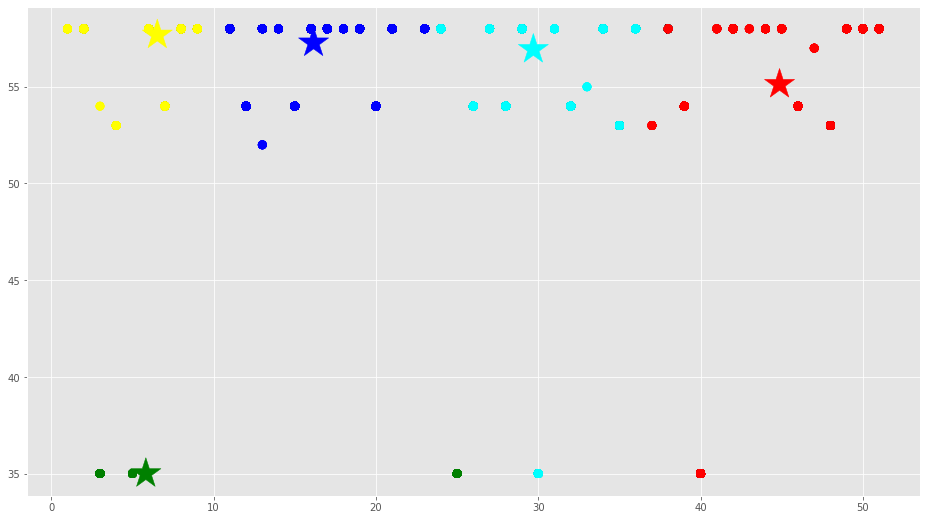

In [508]:

# Getting the values and plotting it
f1 = df['NM'].values
f2 = df['ND'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

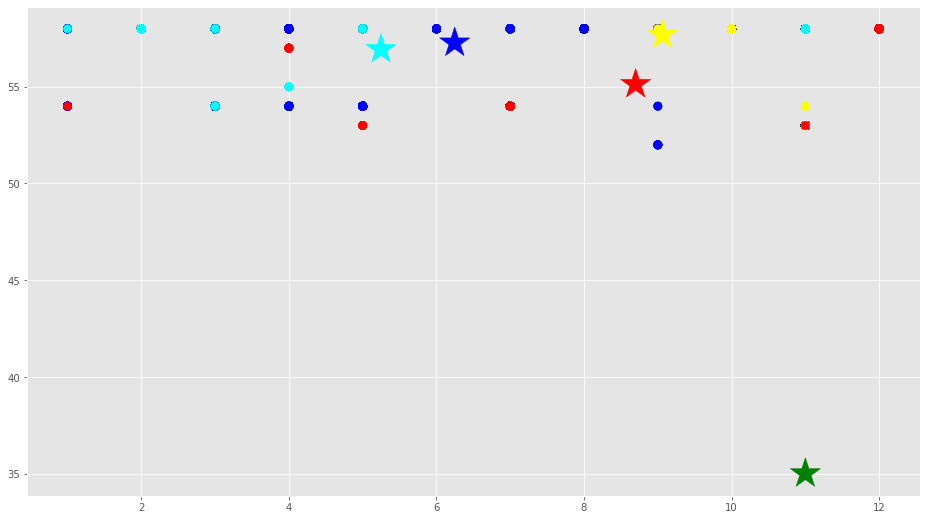

In [510]:
f1 = df['NI'].values
f2 = df['ND'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [457]:
df.to_csv('datos_limpios_2.csv')

In [484]:
len(colores)

11